In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance (5).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor

In [ ]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
print(df.info())
print(df.describe())
print(df.describe(include='object')) # included categorical features in the statistical description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max

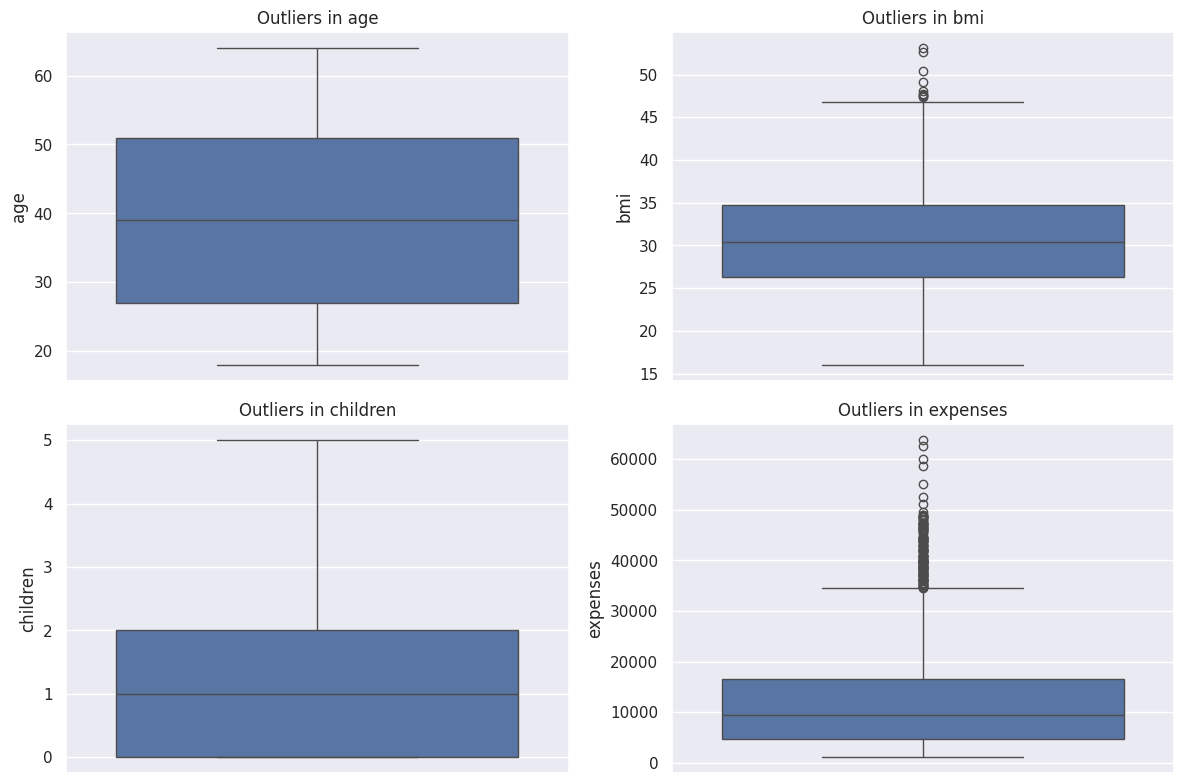

In [ ]:
# boxplot to visualize outliers
# Select numerical columns
numerical_cols = ['age', 'bmi', 'children', 'expenses']

# Create boxplots
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Outliers in {col}')
plt.tight_layout()
plt.show()


# Expenses vs Number of Children
This plot explores how insurance expenses vary based on the number of children. Even though `children` is a numeric column, it behaves like a categorical variable, so we use a boxplot to visualize distribution and outliers.


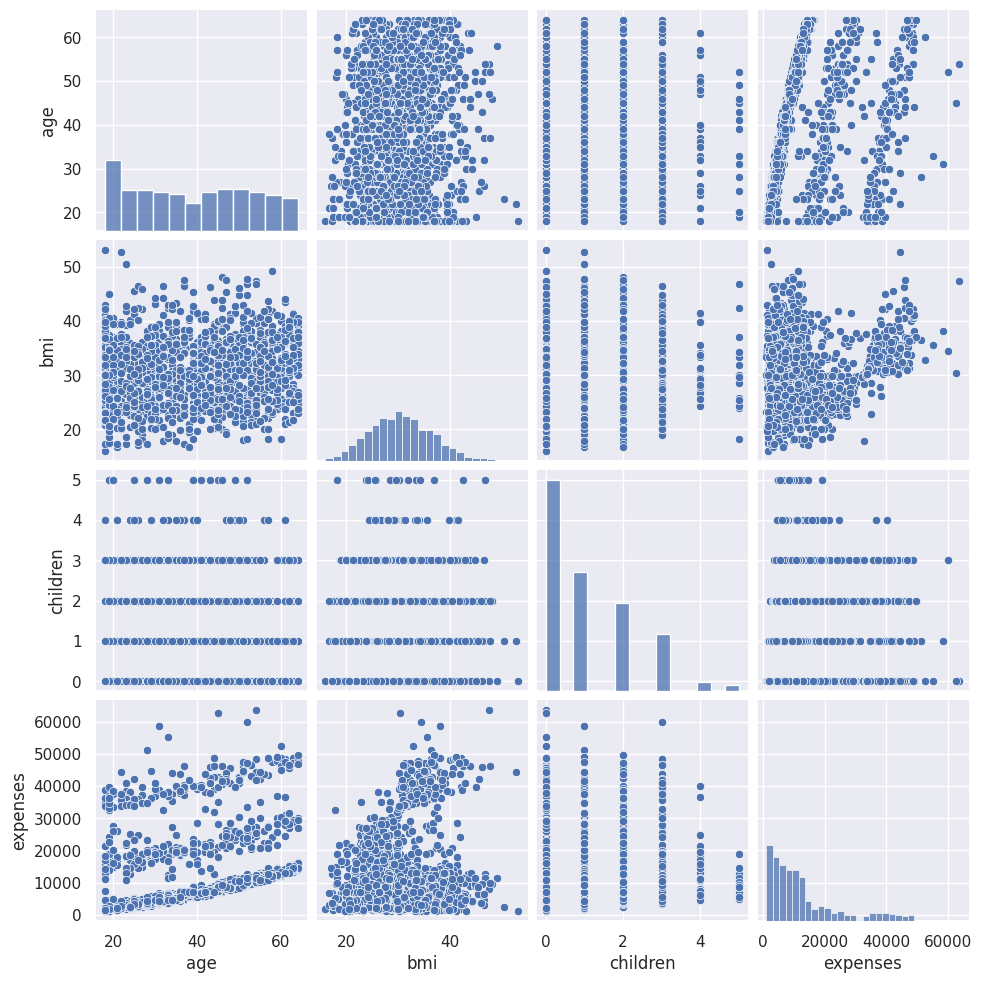

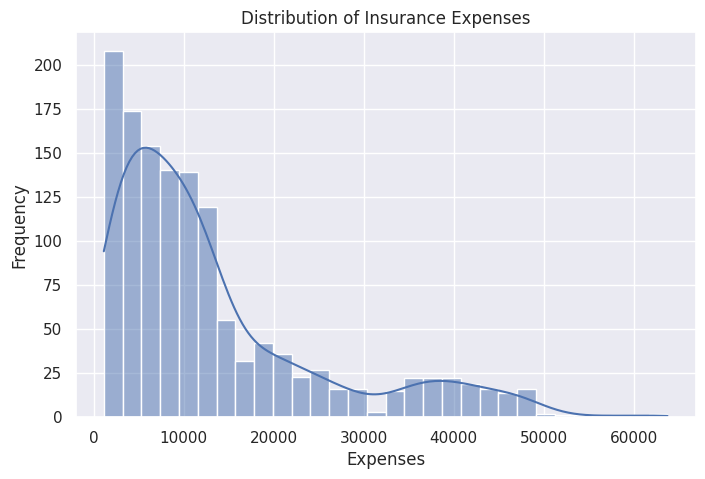

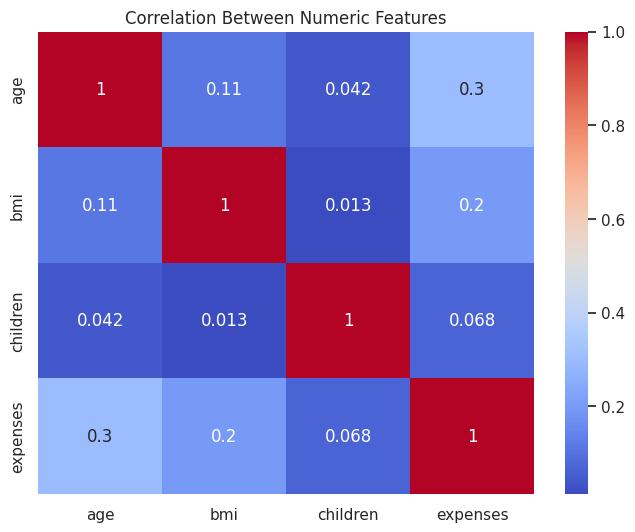

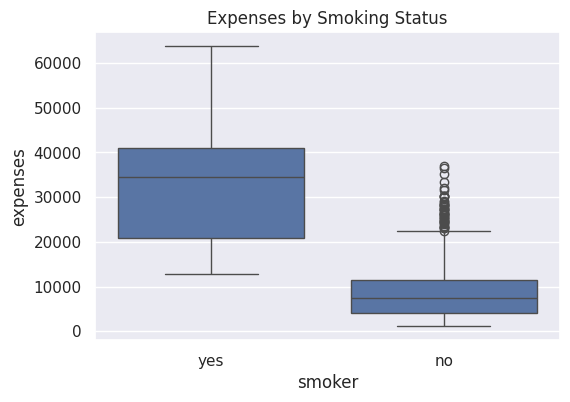

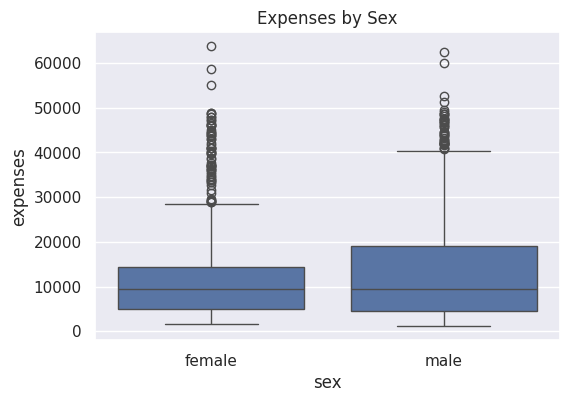

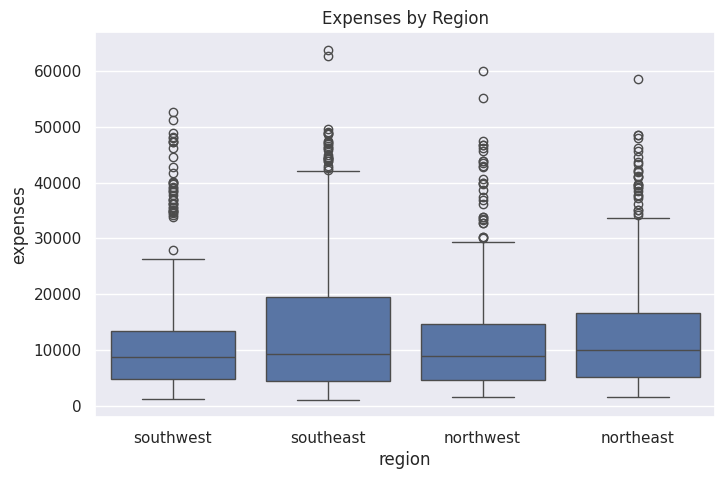

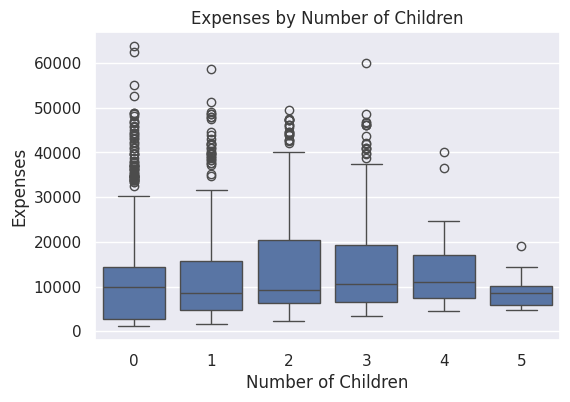

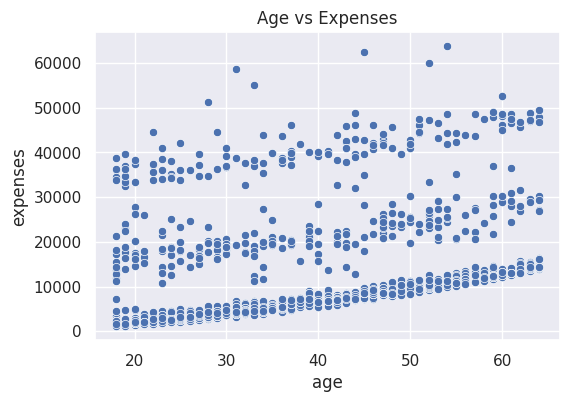

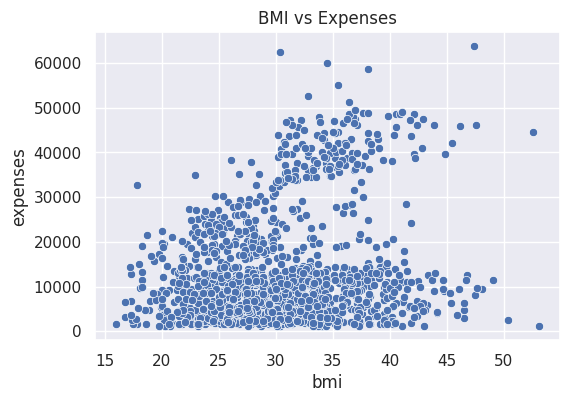

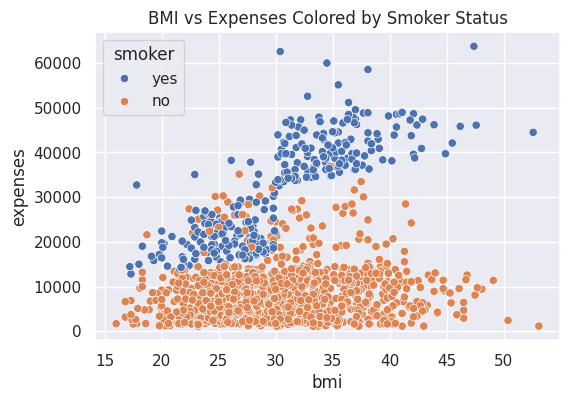

In [ ]:
sns.set(style="darkgrid")
sns.pairplot(df)


# 1. Distribution of Target Variable (Expenses)
plt.figure(figsize=(8, 5))
sns.histplot(df['expenses'], kde=True, bins=30)
plt.title('Distribution of Insurance Expenses')
plt.xlabel('Expenses')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation Heatmap (Numeric Features)
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numeric Features')
plt.show()

## Categorical Features vs Expenses (Boxplots)

# 1. Smoker vs Expenses
plt.figure(figsize=(6, 4))
sns.boxplot(x='smoker', y='expenses', data=df)
plt.title('Expenses by Smoking Status')
plt.show()

# 2. Sex vs Expenses
plt.figure(figsize=(6, 4))
sns.boxplot(x='sex', y='expenses', data=df)
plt.title('Expenses by Sex')
plt.show()

# 3. Region vs Expenses
plt.figure(figsize=(8, 5))
sns.boxplot(x='region', y='expenses', data=df)
plt.title('Expenses by Region')
plt.show()


# 4. Boxplot: Expenses by Number of Children
plt.figure(figsize=(6, 4))
sns.boxplot(x='children', y='expenses', data=df)
plt.title('Expenses by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Expenses')
plt.show()

## Continuous Features vs Expenses (Scatterplots)

# 1. Age vs Expenses
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='expenses', data=df)
plt.title('Age vs Expenses')
plt.show()

# 2. BMI vs Expenses
plt.figure(figsize=(6, 4))
sns.scatterplot(x='bmi', y='expenses', data=df)
plt.title('BMI vs Expenses')
plt.show()

#: Highlight Smokers in BMI vs Expenses
plt.figure(figsize=(6, 4))
sns.scatterplot(x='bmi', y='expenses', hue='smoker', data=df)
plt.title('BMI vs Expenses Colored by Smoker Status')
plt.show()

Before we proceed to preprocessing, let's explore possible interaction between some of the predictors and plot them against the raw target

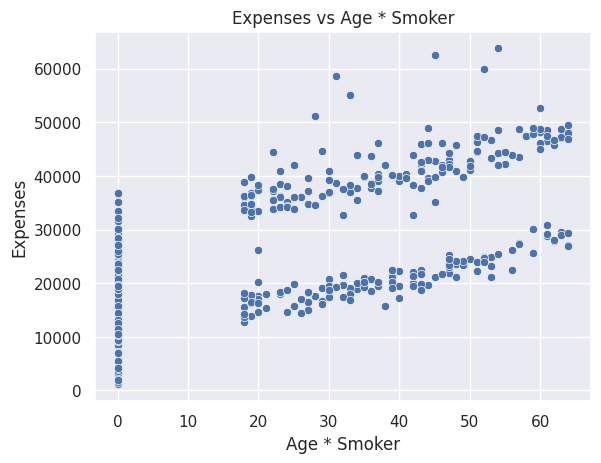

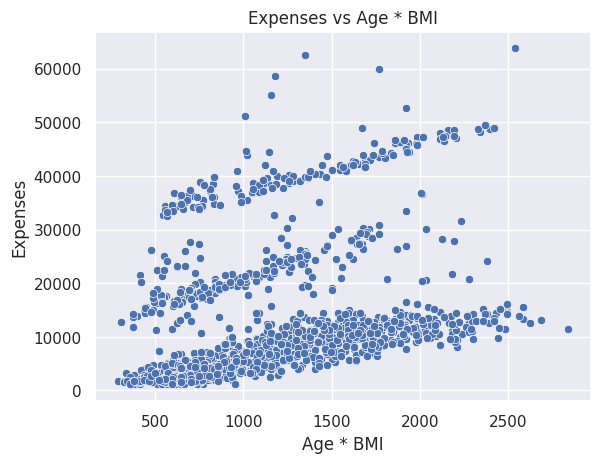

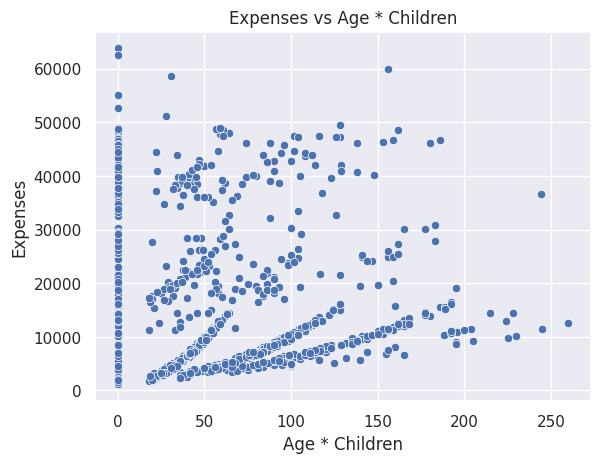

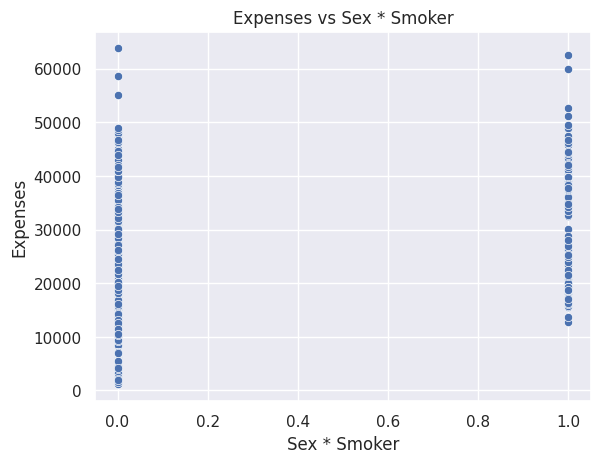

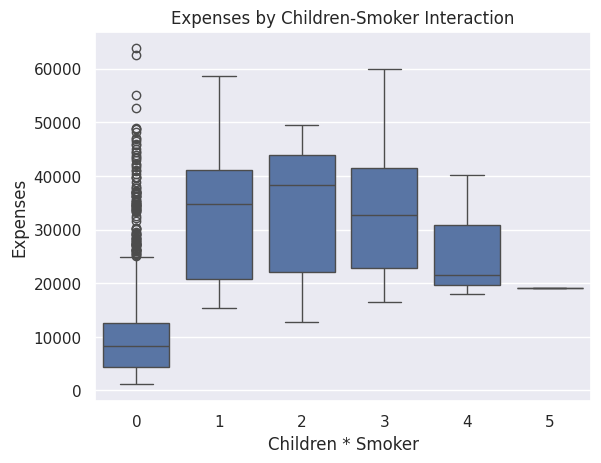

In [ ]:

# 1. Encode Categorical Features
df_encoded = pd.get_dummies(df, drop_first=True).astype(int)

# create interaction terms
sns.scatterplot(x=df_encoded['age'] * df_encoded['smoker_yes'], y=df_encoded['expenses'])
plt.title('Expenses vs Age * Smoker')
plt.xlabel('Age * Smoker')
plt.ylabel('Expenses')
plt.show()

sns.scatterplot(x=df_encoded['age'] * df_encoded['bmi'], y=df_encoded['expenses'])
plt.title('Expenses vs Age * BMI')
plt.xlabel('Age * BMI')
plt.ylabel('Expenses')
plt.show()

sns.scatterplot(x=df_encoded['age'] * df_encoded['children'], y=df_encoded['expenses'])
plt.title('Expenses vs Age * Children')
plt.xlabel('Age * Children')
plt.ylabel('Expenses')
plt.show()

sns.scatterplot(x=df_encoded['sex_male'] * df_encoded['smoker_yes'], y=df_encoded['expenses'])
plt.title('Expenses vs Sex * Smoker')
plt.xlabel('Sex * Smoker')
plt.ylabel('Expenses')
plt.show()

sns.boxplot(x=df_encoded['children'] * df_encoded['smoker_yes'], y=df_encoded['expenses'])
plt.title('Expenses by Children-Smoker Interaction')
plt.xlabel('Children * Smoker')
plt.ylabel('Expenses')
plt.show()


Ploting same interaction terms with the log transformed target.

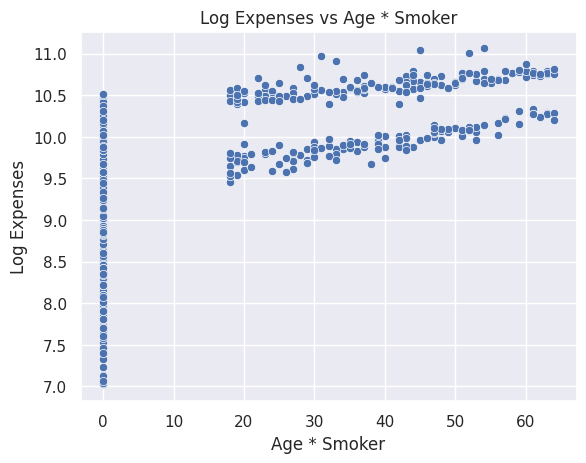

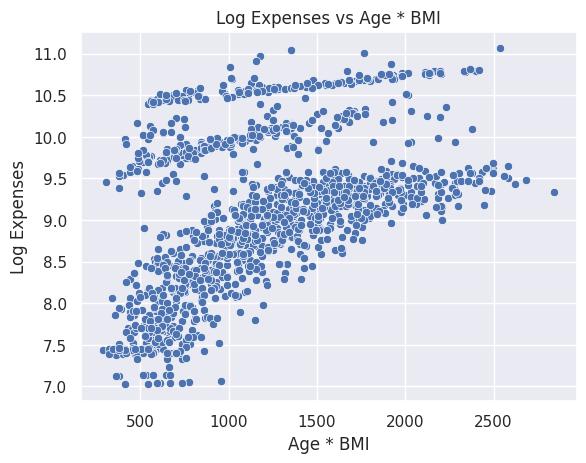

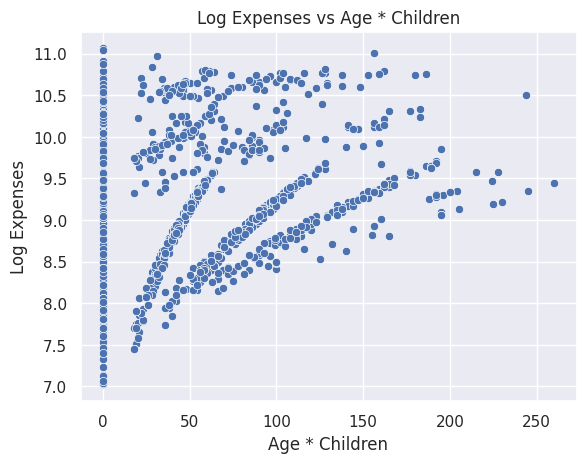

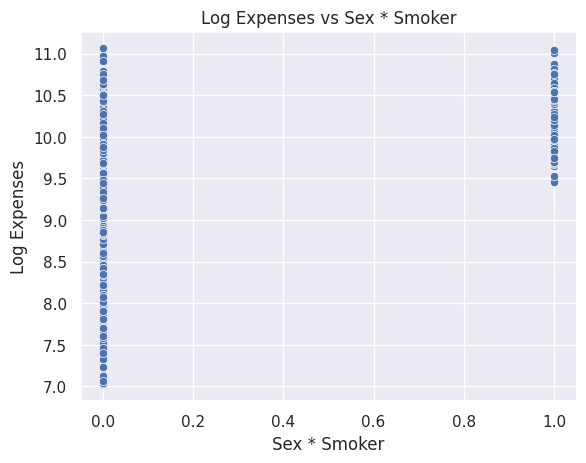

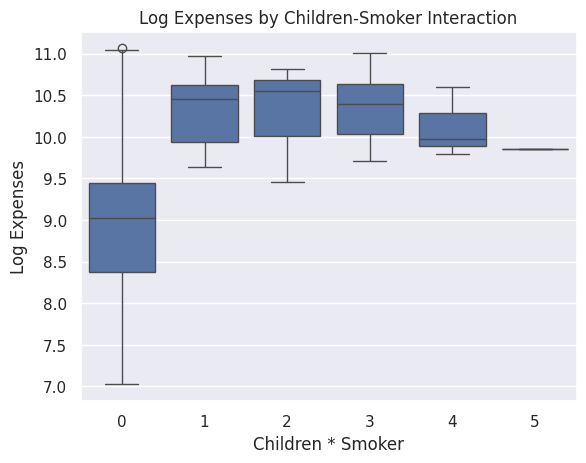

In [ ]:
df['log_expenses'] = np.log1p(df['expenses'])

# age * smoker VS log_expenses
sns.scatterplot(x=df_encoded['age'] * df_encoded['smoker_yes'], y=df['log_expenses'])
plt.title('Log Expenses vs Age * Smoker')
plt.xlabel('Age * Smoker')
plt.ylabel('Log Expenses')
plt.show()

# age * bmi VS log_expenses
sns.scatterplot(x=df_encoded['age'] * df_encoded['bmi'], y=df['log_expenses'])
plt.title('Log Expenses vs Age * BMI')
plt.xlabel('Age * BMI')
plt.ylabel('Log Expenses')
plt.show()

# age * children VS log_expenses
sns.scatterplot(x=df_encoded['age'] * df_encoded['children'], y=df['log_expenses'])
plt.title('Log Expenses vs Age * Children')
plt.xlabel('Age * Children')
plt.ylabel('Log Expenses')
plt.show()

# sex_male * smoker_yes VS log_expenses
sns.scatterplot(x=df_encoded['sex_male'] * df_encoded['smoker_yes'], y=df['log_expenses'])
plt.title('Log Expenses vs Sex * Smoker')
plt.xlabel('Sex * Smoker')
plt.ylabel('Log Expenses')
plt.show()

# children * smoker_yes VS log expenses
sns.boxplot(x=df_encoded['children'] * df_encoded['smoker_yes'], y=df['log_expenses'])
plt.title('Log Expenses by Children-Smoker Interaction')
plt.xlabel('Children * Smoker')
plt.ylabel('Log Expenses')
plt.show()

After perfoming EDA and learning from all the visualizations above including interaction terms, Data Preprocessing would be done next/below

In [ ]:
## Preprocessing begins


## PREPROCESSING PIPELINE

# 1. Encode Categorical Features
df_encoded = pd.get_dummies(df, drop_first=True).astype(int)

# 2. Created Interaction Features (from EDA insights)
df_encoded['bmi_smoker'] = df_encoded['bmi'] * df_encoded['smoker_yes']
df_encoded['age_smoker'] = df_encoded['age'] * df_encoded['smoker_yes']
df_encoded['age_bmi'] = df_encoded['age'] * df_encoded['bmi']
df_encoded['sex_smoker'] = df_encoded['sex_male'] * df_encoded['smoker_yes']
df_encoded['children_smoker'] = df_encoded['children'] * df_encoded['smoker_yes']

# 3. Log-transform Target (used for models like KNN and Linear Regression only)
df_encoded['log_expenses'] = np.log1p(df_encoded['expenses'])  # use np.expm1() to reverse

# 4. Define Features and Targets
X = df_encoded.drop(columns=['expenses', 'log_expenses'])  # independent variables
y_raw = df_encoded['expenses']          # original target
y_log = df_encoded['log_expenses']      # log-transformed target

# 5. Train-Test Split
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(
    X, y_raw, test_size=0.2, random_state=42
)
_, _, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# 6. Scale Features (for scaling-sensitive models like KNN, LR)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_raw)
X_test_scaled = scaler.transform(X_test_raw)

# 7. Check shapes and previews
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)
print("Encoded DataFrame shape:", df_encoded.shape)
print("X sample:\n", X.head().T)
print("y_raw sample:\n", y_raw.head())
print("y_log sample:\n", y_log.head())


X_train_scaled shape: (1070, 13)
X_test_scaled shape: (268, 13)
Encoded DataFrame shape: (1338, 15)
X sample:
                     0    1    2    3    4
age                19   18   28   33   32
bmi                27   33   33   22   28
children            0    1    3    0    0
sex_male            0    1    1    1    1
smoker_yes          1    0    0    0    0
region_northwest    0    0    0    1    1
region_southeast    0    1    1    0    0
region_southwest    1    0    0    0    0
bmi_smoker         27    0    0    0    0
age_smoker         19    0    0    0    0
age_bmi           513  594  924  726  896
sex_smoker          0    0    0    0    0
children_smoker     0    0    0    0    0
y_raw sample:
 0    16884
1     1725
2     4449
3    21984
4     3866
Name: expenses, dtype: int64
y_log sample:
 0    9.734181
1    7.453562
2    8.400659
3    9.998116
4    8.260234
Name: log_expenses, dtype: float64


Here, Linear Regression and KNN are built and evaluted

In [ ]:
# Model dictionary with their settings
models = {
    'Linear Regression': {
        'model': LinearRegression(),
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train_log,
        'y_test': y_test_raw,  # compare with original after exp transform
        'log_target': True
    },
    'KNN': {
        'model': KNeighborsRegressor(n_neighbors=5),
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train_log,
        'y_test': y_test_raw,
        'log_target': True
    },
#     'Decision Tree': {
#         'model': DecisionTreeRegressor(random_state=42),
#         'X_train': X_train_raw,
#         'X_test': X_test_raw,
#         'y_train': y_train_raw,
#         'y_test': y_test_raw,
#         'log_target': False
#     },
#     'Random Forest': {
#         'model': RandomForestRegressor(random_state=42),
#         'X_train': X_train_raw,
#         'X_test': X_test_raw,
#         'y_train': y_train_raw,
#         'y_test': y_test_raw,
#         'log_target': False
#     },
#     'Gradient Boosting': {
#         'model': GradientBoostingRegressor(random_state=42),
#         'X_train': X_train_raw,
#         'X_test': X_test_raw,
#         'y_train': y_train_raw,
#         'y_test': y_test_raw,
#         'log_target': False
#     },
#     'XGBoost': {
#         'model': XGBRegressor(random_state=42, verbosity=0),
#         'X_train': X_train_raw,
#         'X_test': X_test_raw,
#         'y_train': y_train_raw,
#         'y_test': y_test_raw,
#         'log_target': False
#     }
 }

# Evaluation function
def evaluate_model(name, model, X_train, X_test, y_train, y_test, log_target=False):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Reverse log transform if needed
    if log_target:
        y_pred = np.expm1(y_pred)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return {
        "Model": name,
        "R2 Score": r2,
        "MAE": mae,
        "RMSE": rmse
    }

# Run training and evaluation for all models
results = []

for name, config in models.items():
    result = evaluate_model(
        name=name,
        model=config['model'],
        X_train=config['X_train'],
        X_test=config['X_test'],
        y_train=config['y_train'],
        y_test=config['y_test'],
        log_target=config['log_target']
    )
    results.append(result)

# Display results
results_df = pd.DataFrame(results).sort_values(by="R2 Score", ascending=False)
print(results_df)


               Model  R2 Score          MAE         RMSE
0  Linear Regression  0.834835  2396.134631  5063.750765
1                KNN  0.814274  3069.946400  5369.702017


Here, I trained and Evaluated all tree based models on raw dataset without interaction but with log tranformed target variable


In [ ]:
# Step 1: Remove interaction terms
interaction_cols = ['bmi_smoker', 'age_smoker', 'age_bmi', 'sex_smoker', 'children_smoker']
X_base = df_encoded.drop(columns=['expenses', 'log_expenses'] + interaction_cols)

# Step 2: Define log-transformed target
y_log = df_encoded['log_expenses']

# Step 3: Train-test split for tree models (no interaction terms)

X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(
    X_base, y_log, test_size=0.2, random_state=42
)

tree_models = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

# Step 5: Evaluation function (back-transform target for fair comparison)
def evaluate_tree_model(name, model, X_train, X_test, y_train_log, y_test_log):
    model.fit(X_train, y_train_log)
    y_pred_log = model.predict(X_test)

    # Reverse log transformation to get predictions on original scale
    y_pred_raw = np.expm1(y_pred_log)
    y_test_raw = np.expm1(y_test_log)

    r2 = r2_score(y_test_raw, y_pred_raw)
    mae = mean_absolute_error(y_test_raw, y_pred_raw)
    rmse = np.sqrt(mean_squared_error(y_test_raw, y_pred_raw))

    return {
        "Model": name,
        "R2 Score": r2,
        "MAE": mae,
        "RMSE": rmse
    }

# Step 6: Run training & evaluation
tree_results = []

for name, model in tree_models.items():
    result = evaluate_tree_model(
        name=name,
        model=model,
        X_train=X_train_tree,
        X_test=X_test_tree,
        y_train_log=y_train_tree,
        y_test_log=y_test_tree
    )
    tree_results.append(result)

# Step 7: Display results
tree_results_df = pd.DataFrame(tree_results).sort_values(by='R2 Score', ascending=False)
print(tree_results_df)


               Model  R2 Score          MAE         RMSE
1      Random Forest  0.874109  2167.859703  4420.904413
2  Gradient Boosting  0.860035  2135.616335  4661.479151
3            XGBoost  0.821872  2626.402179  5258.716182
0      Decision Tree  0.663054  3545.376765  7232.594639


Here, I trained tree models on raw dataset without interaction terms but also on raw target variable (skewed target)

In [ ]:
# Step 1: Define base X (no interaction terms)
interaction_cols = ['bmi_smoker', 'age_smoker', 'age_bmi', 'sex_smoker', 'children_smoker']
X_base = df_encoded.drop(columns=['expenses', 'log_expenses'] + interaction_cols)

# Step 2: Define raw target
y_raw = df_encoded['expenses']

# Step 3: Train-test split

X_train_tree_raw, X_test_tree_raw, y_train_tree_raw, y_test_tree_raw = train_test_split(
    X_base, y_raw, test_size=0.2, random_state=42
)

# Step 4: Define tree models

tree_models_raw_y = {
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, verbosity=0)
}

# Step 5: Evaluation function (no transformation needed)
def evaluate_tree_model_raw(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return {
        "Model": name,
        "R2 Score": r2,
        "MAE": mae,
        "RMSE": rmse
    }

# Step 6: Train and evaluate
tree_results_raw_y = []

for name, model in tree_models_raw_y.items():
    result = evaluate_tree_model_raw(
        name=name,
        model=model,
        X_train=X_train_tree_raw,
        X_test=X_test_tree_raw,
        y_train=y_train_tree_raw,
        y_test=y_test_tree_raw
    )
    tree_results_raw_y.append(result)

# Step 7: Display results
tree_results_raw_y_df = pd.DataFrame(tree_results_raw_y).sort_values(by='R2 Score', ascending=False)
print(tree_results_raw_y_df)


               Model  R2 Score          MAE         RMSE
2  Gradient Boosting  0.879006  2469.606602  4334.075205
1      Random Forest  0.857414  2708.901117  4704.919035
3            XGBoost  0.823226  3068.154785  5238.693158
0      Decision Tree  0.684147  3423.530473  7002.553031


Performing Gridsearch on top three models (Gradient Boosting, Random Forest and XGBoost)

In [ ]:


# Define refined search grid
grid_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 6, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'subsample': [0.9, 1.0],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV
gb_grid = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=grid_params,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# Fit on training data (no log transform)
gb_grid.fit(X_train_tree, y_train_tree_raw)

# Output results
print(" Gradient Boosting Best Parameters:", gb_grid.best_params_)
print(" Gradient Boosting Best R² (CV):", gb_grid.best_score_)



# XGBoost: Define refined search grid
grid_params_xgb = {
    'n_estimators': [50, 150, 200],
    'learning_rate': [0.05, 0.1, 0.15],
    'max_depth': [3, 6, 10],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Set up GridSearchCV for XGBoost
xgb_grid = GridSearchCV(
    estimator=XGBRegressor(random_state=42, verbosity=0),
    param_grid=grid_params_xgb,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit XGBoost model on training data (raw predictors and raw target)
xgb_grid.fit(X_train_tree, y_train_tree_raw)

# Output best results for XGBoost
print("XGBoost Best Parameters:", xgb_grid.best_params_)
print("XGBoost Best R² Score:", xgb_grid.best_score_)

# Random Forest: Define refined search grid

grid_params_rf = {
    'n_estimators': [50, 150, 200],
    'max_depth': [3, 6, 10],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Set up GridSearchCV for Random Forest
rf_grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=grid_params_rf,
    scoring='r2',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit Random Forest model on training data
rf_grid.fit(X_train_tree, y_train_tree_raw)

# Output best results for Random Forest
print("Random Forest Best Parameters:", rf_grid.best_params_)
print("Random Forest Best R² Score:", rf_grid.best_score_)




Fitting 5 folds for each of 432 candidates, totalling 2160 fits
 Gradient Boosting Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150, 'subsample': 0.9}
 Gradient Boosting Best R² (CV): 0.8488920932051757
Fitting 5 folds for each of 108 candidates, totalling 540 fits
XGBoost Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.9}
XGBoost Best R² Score: 0.85117506980896
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Random Forest Best Parameters: {'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}
Random Forest Best R² Score: 0.8418723464028963


In [ ]:
best_gb_grid = GradientBoostingRegressor(
    learning_rate=0.05,
    max_depth=4,
    max_features='log2',
    min_samples_leaf=2,
    min_samples_split=2,
    n_estimators=150,
    subsample=1.0,
    random_state=42
)

best_gb_grid.fit(X_train_tree, y_train_tree_raw)

# eveluate
y_pred_grid = best_gb_grid.predict(X_test_tree)

r2 = r2_score(y_test_tree_raw, y_pred_grid)
mae = mean_absolute_error(y_test_tree_raw, y_pred_grid)
rmse = np.sqrt(mean_squared_error(y_test_tree_raw, y_pred_grid))

print("\nGradientBoosting Final Model Evaluation:")
print(f"Test R²: {r2:.4f}")
print(f"Test MAE: {mae:.2f}")
print(f"Test RMSE: {rmse:.2f}")


best_rf = RandomForestRegressor(
    random_state=42,
    max_depth=6,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=4,
    n_estimators=150
)

# Retrain on the full training set
best_rf.fit(X_train_tree, y_train_tree_raw)

# Predict on the test set
y_pred_rf = best_rf.predict(X_test_tree)

# Evaluate performance
r2_rf = r2_score(y_test_tree_raw, y_pred_rf)
mae_rf = mean_absolute_error(y_test_tree_raw, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test_tree_raw, y_pred_rf))

print("\nRandom Forest Final Model Evaluation:")
print(f"Test R²: {r2_rf:.4f}")
print(f"Test MAE: {mae_rf:.2f}")
print(f"Test RMSE: {rmse_rf:.2f}")

best_xgb = XGBRegressor(
    random_state=42,
    colsample_bytree=1.0,
    learning_rate=0.07,
    max_depth=3,
    n_estimators=150,
    subsample=1.0,
    verbosity=0
)

# Retrain on the full training set
best_xgb.fit(X_train_tree, y_train_tree_raw)

# Predict on the test set
y_pred_xgb = best_xgb.predict(X_test_tree)

# Evaluate performance
r2_xgb = r2_score(y_test_tree_raw, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test_tree_raw, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test_tree_raw, y_pred_xgb))

print("\nXGBoost Final Model Evaluation:")
print(f"Test R²: {r2_xgb:.4f}")
print(f"Test MAE: {mae_xgb:.2f}")
print(f"Test RMSE: {rmse_xgb:.2f}")




GradientBoosting Final Model Evaluation:
Test R²: 0.8802
Test MAE: 2485.37
Test RMSE: 4313.15

Random Forest Final Model Evaluation:
Test R²: 0.8669
Test MAE: 2844.40
Test RMSE: 4546.40

XGBoost Final Model Evaluation:
Test R²: 0.8804
Test MAE: 2427.62
Test RMSE: 4309.89


Visualizing Feature importance across all three Top Models

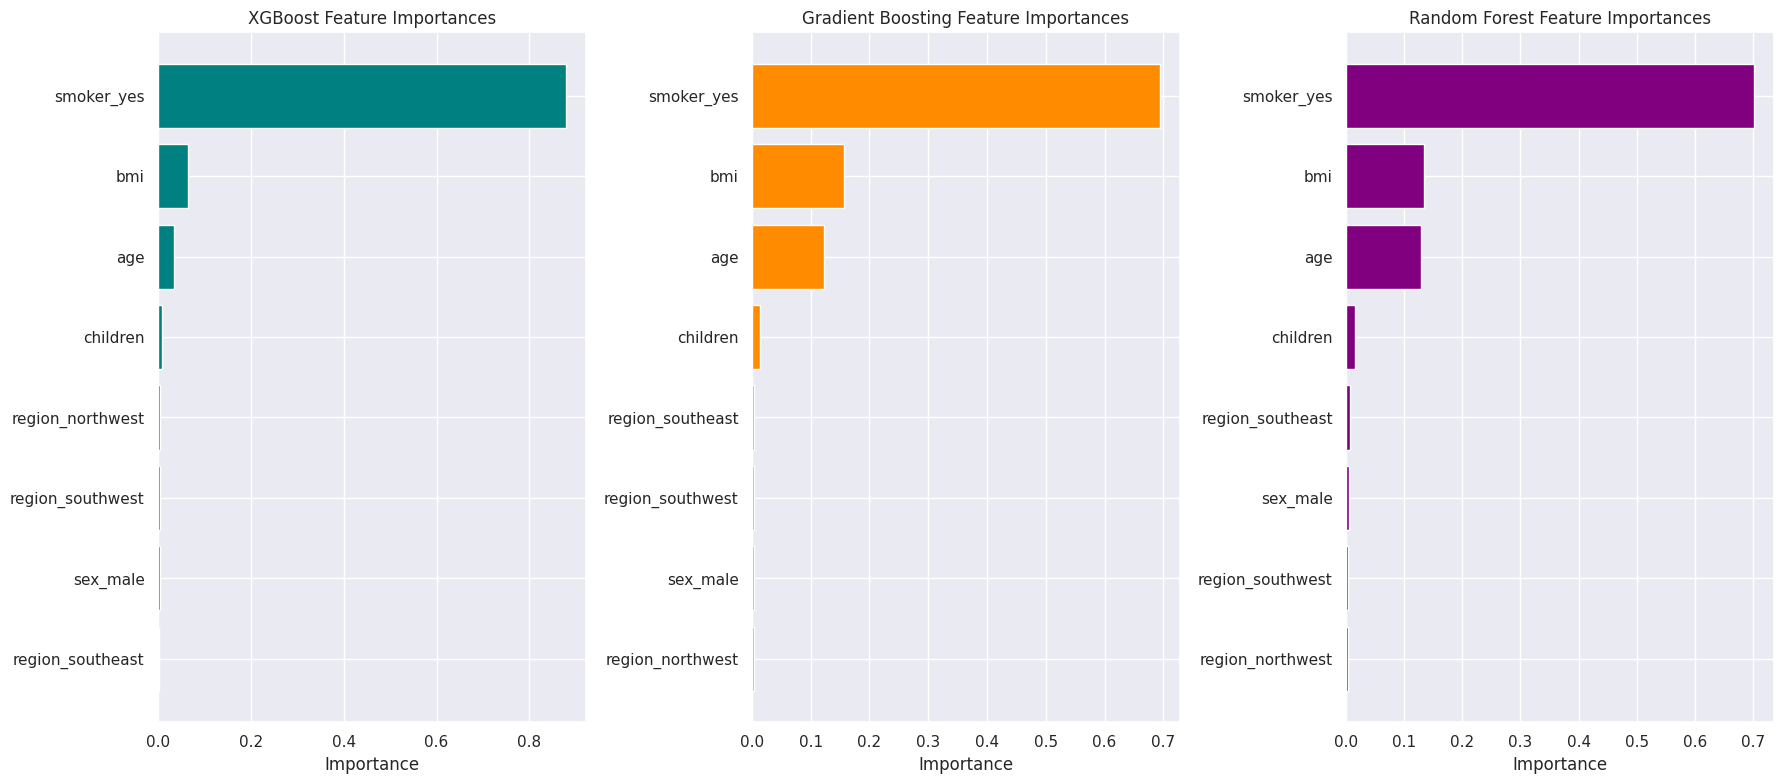

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


features = X_train_tree.columns

# Create DataFrames for feature importances for each model
df_xgb = pd.DataFrame({
    'Feature': features,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=True)

df_gb = pd.DataFrame({
    'Feature': features,
    'Importance': best_gb_grid.feature_importances_
}).sort_values(by='Importance', ascending=True)

df_rf = pd.DataFrame({
    'Feature': features,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=True)

# Create a figure with three subplots for side-by-side comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 8))

# XGBoost Feature Importance Plot
axes[0].barh(df_xgb['Feature'], df_xgb['Importance'], color='teal')
axes[0].set_title("XGBoost Feature Importances")
axes[0].set_xlabel("Importance")

# Gradient Boosting Feature Importance Plot
axes[1].barh(df_gb['Feature'], df_gb['Importance'], color='darkorange')
axes[1].set_title("Gradient Boosting Feature Importances")
axes[1].set_xlabel("Importance")

# Random Forest Feature Importance Plot
axes[2].barh(df_rf['Feature'], df_rf['Importance'], color='purple')
axes[2].set_title("Random Forest Feature Importances")
axes[2].set_xlabel("Importance")

plt.tight_layout()
plt.show()


In [ ]:
import joblib

joblib.dump(best_xgb, 'xgb_model.pkl')
print("Final Model saved as 'xgb_model.pkl'")

Final Model saved as 'xgb_model.pkl'


In [ ]:
loaded_model = joblib.load('xgb_model.pkl')

In [ ]:
!ls -lh | grep xgb_model.pkl
!ls -lh /content



-rw-r--r-- 1 root root 175K Apr 14 05:23 xgb_model.pkl
total 2.2M
-rw-r--r-- 1 root root 478K Apr 14 05:22  gb_model.pkl
-rw-r--r-- 1 root root  50K Apr 13 23:26 'insurance (1).csv'
-rw-r--r-- 1 root root  50K Apr 14 00:26 'insurance (2).csv'
-rw-r--r-- 1 root root  50K Apr 14 01:10 'insurance (3).csv'
-rw-r--r-- 1 root root  55K Apr 14 02:31 'insurance (4).csv'
-rw-r--r-- 1 root root  55K Apr 14 04:36 'insurance (5).csv'
-rw-r--r-- 1 root root  50K Apr 13 22:53  insurance.csv
-rw-r--r-- 1 root root 1.2M Apr 14 05:22  rf_model.pkl
drwxr-xr-x 1 root root 4.0K Apr 10 13:37  sample_data
-rw-r--r-- 1 root root 175K Apr 14 05:23  xgb_model.pkl


In [ ]:
import ipywidgets as widgets
from IPython.display import display

# Create a Text widget with a placeholder
text_input = widgets.Text(
    value='',
    placeholder='Enter your value here',
    description='Input:',
    disabled=False
)

display(text_input)


Text(value='', description='Input:', placeholder='Enter your value here')